# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [16]:
install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

Warning message:
"package 'kohonen' is in use and will not be installed"


[1] 25  5

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

[[1]]
         WATER    PROTEIN        FAT    LACTOSE        ASH
V1  0.39865658 -0.4728372 -0.3909112  0.5607238 -0.1528777
V2  0.89691196 -1.2370407 -0.7361600  0.9342731 -1.1587324
V3 -1.49525815  1.2444327  1.4700551 -1.4135230  0.9068605
V4  0.05576888  0.5913043 -0.1874398 -0.4359170  0.4298898



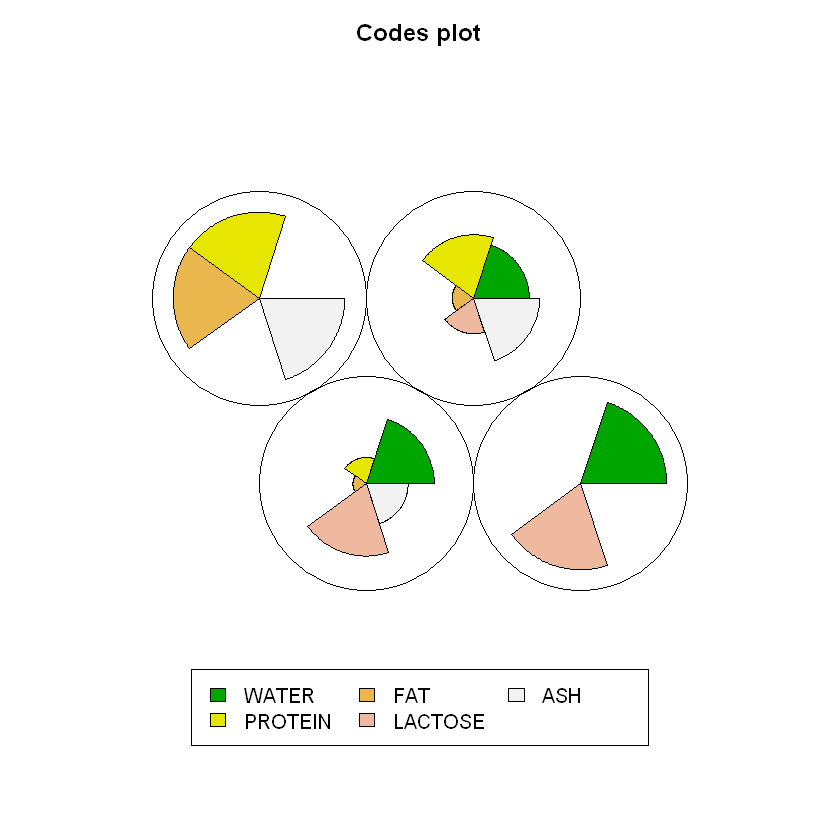

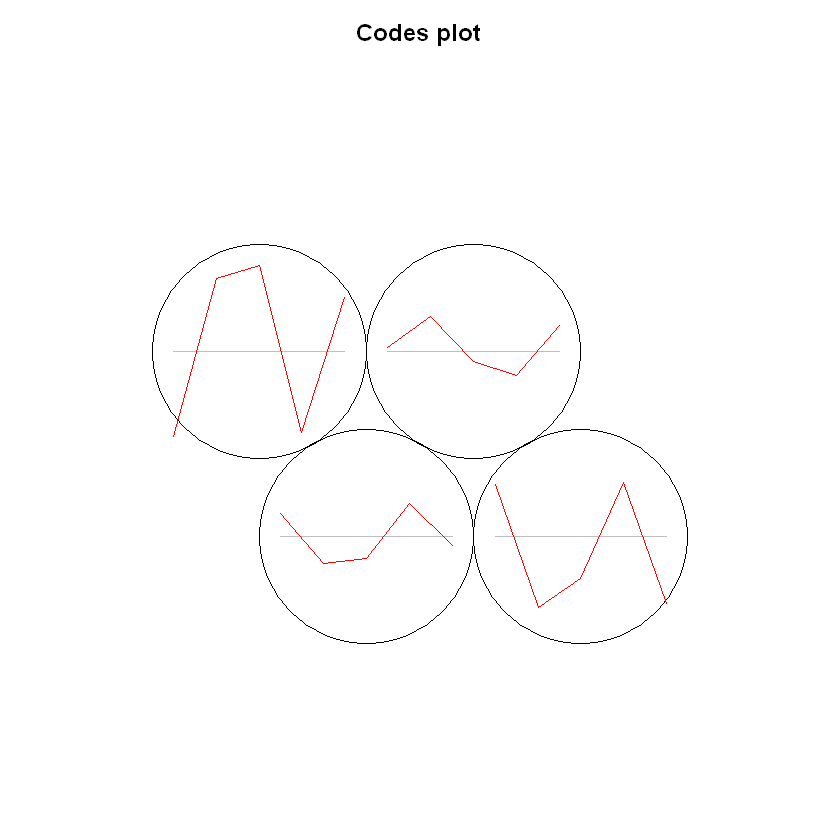

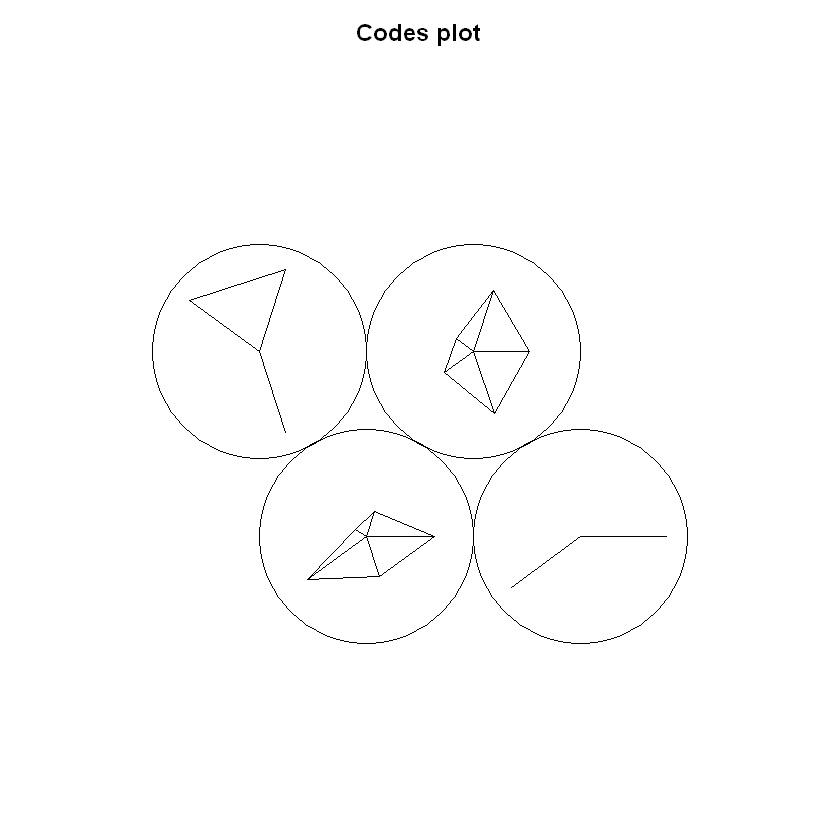

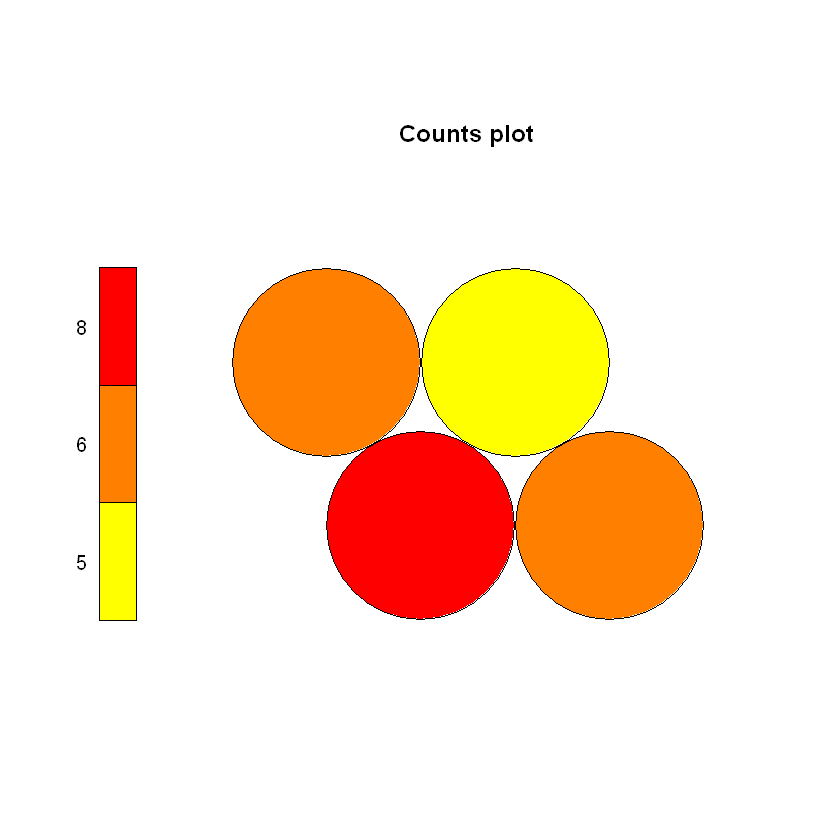

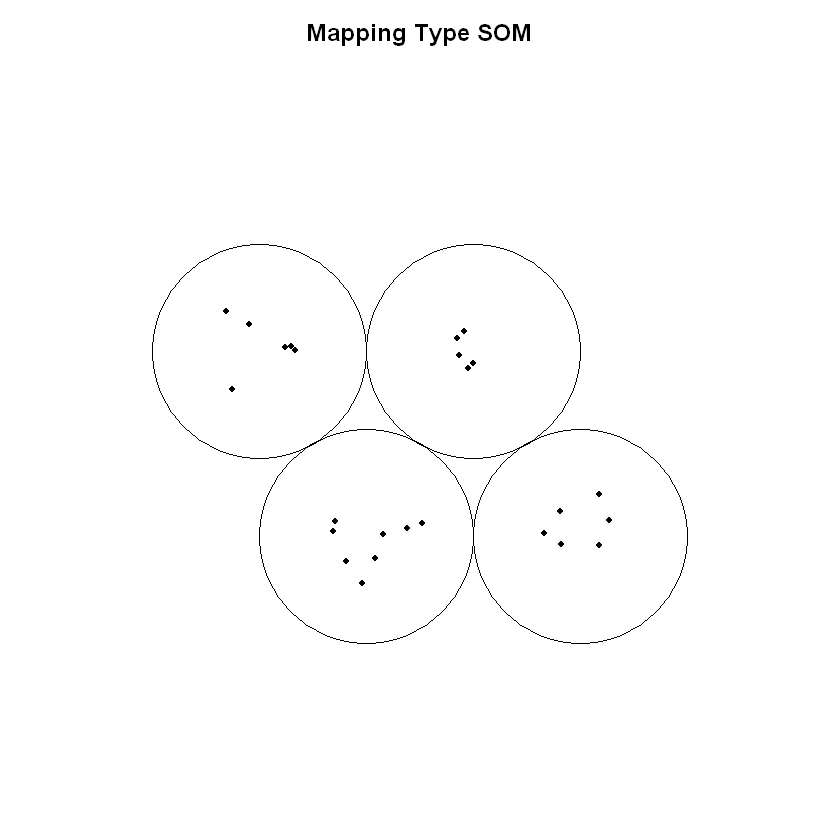

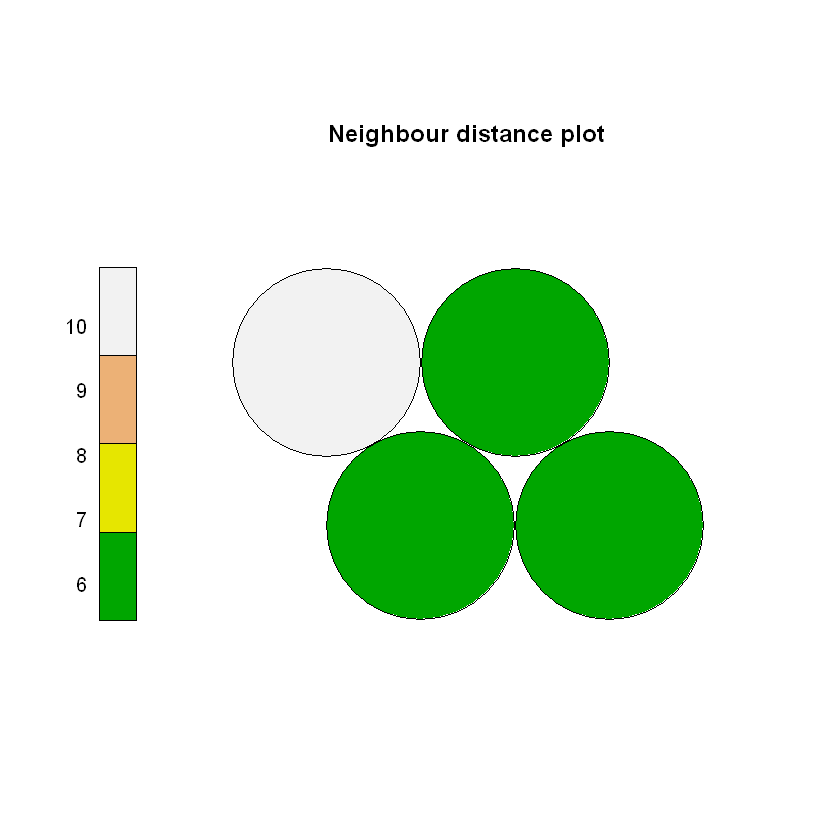

In [14]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

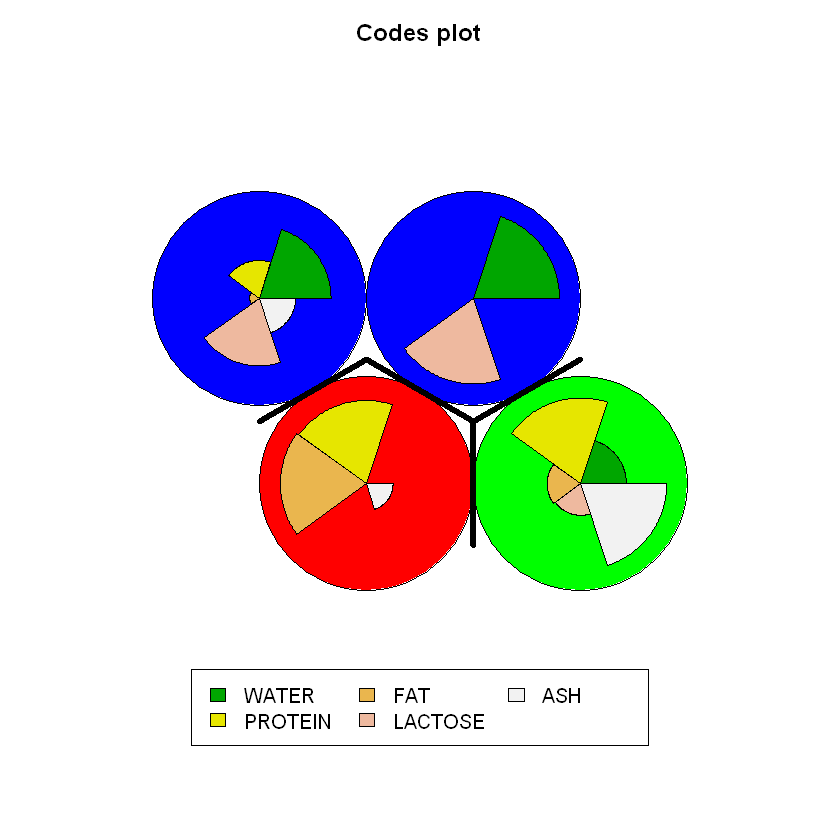

In [4]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


**Ejercicio 2:**

a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos. 

b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método SOM con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

**Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores. 

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados 

b) Escoja alguno de los otros métodos de agrupamiento estudiado en esta unidad y compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.